In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('car_accident_1.csv',index_col=0)

# Column Shaping

In [95]:
def year(row):
    return str(row).split('-')[0]
def month(row):
    return str(row).split('-')[1]

In [96]:
data['年']=data['日期'].apply(year)
data['月']=data['日期'].apply(month)
data.drop(columns='日期',inplace=True)

In [97]:
def category(row):
    return str(row).split(',')[1]

In [98]:
data['案號']=data['字號'].apply(category)
data.drop(columns='字號',inplace=True)

In [115]:
cols=data.columns.tolist()

['年',
 '月',
 '案號',
 '案由',
 '歷審裁判',
 '裁判',
 '主文_key',
 '全文_key',
 '法院見解_key',
 '主文_斷詞',
 '全文_斷詞',
 '法院見解_斷詞',
 '主文',
 '全文',
 '法院見解',
 '法條1',
 '法條2',
 '法條3',
 '法條4',
 '法條5',
 '法條6',
 '法條7',
 '法條8',
 '法條9',
 '法條10']

In [113]:
cols=','.join(cols[-3:])+','+cols[0]+','+cols[3]+','+cols[2]+','+cols[-5]+','+cols[-6]+','+cols[-4]+','+cols[-8]+','+cols[-9]+','+cols[-7]+','+cols[4]+','+cols[1]+','+cols[5]+','+','.join(cols[6:16])

In [ ]:
cols=cols.split(',')
data=data[cols]

In [116]:
data.head(1)

,年,月,案號,案由,歷審裁判,裁判,主文_key,全文_key,法院見解_key,主文_斷詞,...,法條1,法條2,法條3,法條4,法條5,法條6,法條7,法條8,法條9,法條10
6,2011,12,保險,給付補償金,NaN,判決,原告 之訴 訴訟費 負擔,原告 責任 條第 汽車 機車 強制 保險法 行為 被告 酒醉,條第 汽車 責任 保險法 行為 強制 原告 駕車 酒醉 28,原告 之訴 駁 回 訴訟費 由 原告 負擔,...,中華民國刑法,強制汽車責任保險法,民事訴訟法,道路交通安全規則,NaN,NaN,NaN,NaN,NaN,NaN


## Final Decision Merging (Not Used Eventually)

In [210]:
data=data.sort_values('年', ascending=False).drop_duplicates('全文').sort_index()
data_new=data.sort_values('年', ascending=False).drop_duplicates('歷審裁判').sort_index()
data_old=data_old.sort_values('年', ascending=True).drop_duplicates('歷審裁判').sort_index()

In [264]:
unique_case=dict(data['歷審裁判'].value_counts())

In [268]:
three_cases=[]
for key,value in unique_case.items():
    if value == 3:
         three_cases.append(key)

In [271]:
three_cases

['263a1fc62b17da912e097eb4090ae1ab',
 '09dfa708ecafb2012fe1a85f7cb42a84',
 'b2a07a95bf3ba53783ffe299328ff2ca',
 'e41943aa3a03fcafab9b2823bbb04997',
 'c7935a08b879f44296326913d52ce295',
 'd627dc0def3bb7e3860b1b9660d4fa0c']

In [176]:
import pycnnum as cn
import re
cn.cn2num('壹拾陸萬肆仟壹佰玖拾伍')

164195

In [22]:
def money(row):  
    ls=re.split(r'(，|。)',str(row))
    if '新臺幣' in ls[0] and '被告' in ls[0]:
        return cn.cn2num(ls[0].split('新臺幣')[1].split('元')[0])
    elif '新台幣' in ls[0] and '被告' in ls[0]:
        return cn.cn2num(ls[0].split('新台幣')[1].split('元')[0])
    else:
        return 'lose'

In [178]:
money('一、被告應給付原告新臺幣壹拾陸萬肆仟壹佰玖拾伍元。及自民國一百零四年十二月十日起至清償日止，')

164195

In [168]:
#def law_suit_money(row):  
    #if '訴訟費用新臺幣' in str(row):
        #return cn.cn2num(str(row).split('新臺幣')[1].split('元')[0])
    #elif '訴訟費用新台幣'in str(row):
        #return cn.cn2num(str(row).split('新台幣')[1].split('元')[0])
    #else:
        #return '無金錢交涉'

In [137]:
#data.drop(['結果','訴訟金額','年息'],inplace=True,axis=1)

In [179]:
data['賠償金額']=data['主文'].apply(money)

In [182]:
data.to_csv('car_accident_money.csv')

# Decision Tree to find Keywords

In [61]:
import time as time
start=time.time()
print('{} seconds has passed'.format(round(time.time()-start,2)))

0.0 seconds has passed


In [29]:
data['merge']=data.apply(lambda row:str(row['全文_key'])+" "+str(row['法院見解_key']),axis=1)

In [173]:
data['merge_all']=data.apply(lambda row:str(row['全文'])+" "+str(row['法院見解']),axis=1)

In [185]:
data_key=data[(data['賠償金額']!='lose') & (data['賠償金額']!=0)]

In [111]:
data_key.iloc[1,12]

'被告應給付原告新台幣貳佰捌拾萬元，及自民國九十九年七月八日起至清償日止，按年息百分之十計算之利息。訴訟費用由被告負擔。本判決於原告以新台幣玖拾參萬參仟元供擔保後，得為假執行；被告如以新台幣貳佰捌拾萬元預供擔保，得免為假執行事實及理由壹、程序部分：按訴狀送達後，原告不得將原訴變更或追加他訴。但有下列各款情形之一者，不在此限：三、擴張或減縮應受判決事項之聲明者。民事訴訟法第二百五十五條第一項第三款有明文規定。查原告起訴時之訴之聲明為：被告應給付原告新台幣（下同）二百八十萬元及自九十八年三月六日之翌日起至清償日止，按週年利率百分之十計算之利息，後減縮為：被告應給付原告二百八十萬元及自本案支付命令送達翌日即九十九年七月八日起，至清償日止，按年息百分之十計算之利息，經核原告為上開訴之聲明之減縮，與上開法文之規定並無不合，應予准許，先予敘明。貳、實體部份:'

In [189]:
data_key.to_excel('car_accident_money.xlsx')
data_key.to_csv('car_accident_money.csv')

In [30]:
import numpy as np
X=data_key.loc[:,['賠償金額','merge']]
y=X['賠償金額']
X=X['merge']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [31]:
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(X)
names=vectorizer.get_feature_names()

In [32]:
y=np.array(y)
X_tf=X_tf.toarray()

In [33]:
print(X_tf.shape)
print(y.shape)

(4862, 3163)
(4862,)


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtree = DecisionTreeRegressor()
dtree.fit(X_tf,y)

In [39]:
impo_features=(dict(zip(names,dtree.feature_importances_)))
impo_features=dict(sorted(impo_features.items(),key=lambda x:x[1],reverse=True))

In [41]:
data_count=pd.DataFrame(columns = ['Index','Keyword' , 'Importance_Score'])
index=1
for k, v in impo_features.items():
    ls=[index,k,v]
    data_count.loc[index-1]=ls
    index+=1
data_count

,Index,Keyword,Importance_Score
0,1,領系爭,0.772794
1,2,互助金,0.057955
2,3,宏大,0.025417
3,4,看護費,0.009009
4,5,美國,0.007411
5,6,孫欲禎,0.007276
6,7,江波,0.007120
7,8,認諾,0.006327
8,9,游泳,0.005649
9,10,車輛,0.005448


In [73]:
data_count.to_excel('keywords.xlsx')

In [ ]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下
plt.rcParams['font.sans-serif']=['SimHei']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text xticklabel objects>)

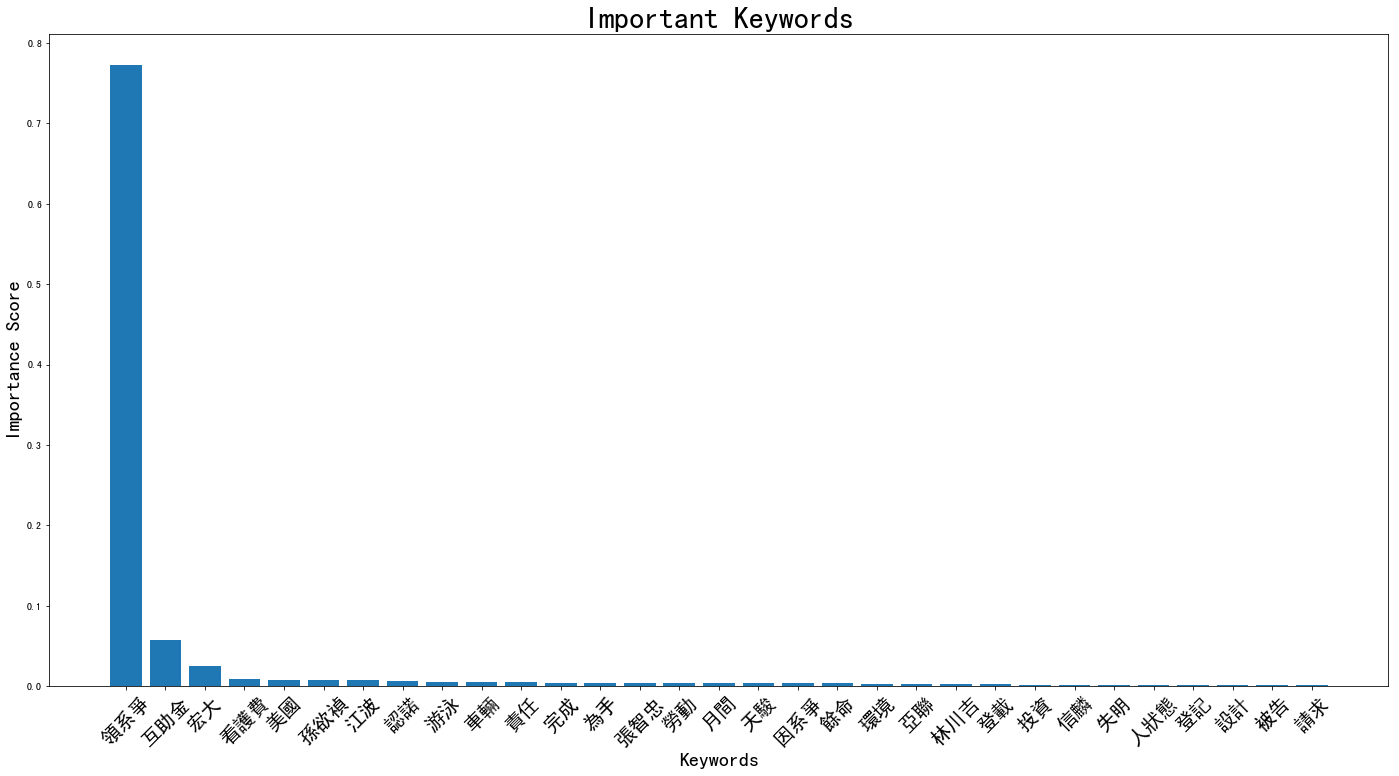

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.bar(data_count.loc[:30,'Keyword'],data_count.loc[:30,'Importance_Score'])
plt.title('Important Keywords', fontsize=30)
plt.xlabel('Keywords', fontsize=20)
plt.ylabel('Importance Score', fontsize=20)
plt.xticks(fontsize=20,rotation=45)

# Write to TXT to determine Keywords Influencing Price

In [112]:
import csv
import sys
csv.field_size_limit(1000000)

524288000

In [119]:
# overlap( all files)
with open('car_accident_money.csv','r',encoding='utf-8') as f:
    next(f)     #skip first row
    reader = csv.reader(f)
    index=1
    for row in reader:
        with open('./car_accident_money_token/'+row[1]+'_'+row[2]+'_'+row[3]+'_'+str(index)+'.txt','w',encoding='utf-8') as file:
            label,context,court= row[4], row[11],row[12]
            file.write(label+'\n\n'+context+'\n\n'+court)
        file.close()

In [ ]:
#not overlap (unique_year_case files)
with open('car_accident_money.csv','r',encoding='utf-8') as f:
    next(f)     #skip first row
    reader = csv.reader(f)
    index=0
    for row in reader:
        index+=1
        with open('./car_accident_keyword_token/'+row[1]+'_'+row[3]+'.txt','w',encoding='utf-8') as file:
            label,context,court= row[4], row[11],row[12]
            file.write(label+'\n\n'+context+'\n\n'+court)
        file.close()